In [1]:
#%matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
#matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv("/Users/cesare.chung/Dropbox/2017ML/CHPT-NTHU/Working_Directory_/Python/forPYTHON.csv")

In [3]:
df['AuThick_Average'].corr(df['TIME3132'],method='pearson')


0.86245914047159056

In [4]:
df[df.TIME3132 >= 50]['AuThick_Average'].corr(df['TIME3132'],method='pearson')

0.97703405138829824

In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0).head()

Unnamed: 0       0
MACHINE_ID       0
EVENTDATETIME    0
END_TIME         0
IN_TIME          0
dtype: int64

In [6]:
df['AC_GOLD_TIME'].head()
df[['AuThick_Average','AC_GOLD_TIME']].head()

,AuThick_Average,AC_GOLD_TIME
0,20.958046,2100
1,21.539106,2200
2,37.606258,3850
3,23.053732,2200
4,20.961532,2200


In [8]:
##FILTERING Records
df[df['AC_GOLD_TIME']>5000]
df[(df['AC_GOLD_TIME']>3000)&(df['ERP_EAuThick']==30)]
df[(df.AC_GOLD_TIME   >3000)&(df.ERP_EAuThick   ==30)]
df[(df['AC_GOLD_TIME']>3000)|(df['ERP_EAuThick']==30)].head()

In [9]:
##FILTERING Records
df[:45]
df[2:40]
df.head(10)
df.describe()
df.dtypes
df.columns
len(df)
df.shape
df.sum()
df.sum(axis=1)
df.mean()
df.mean(axis=1)
df[['AUTHICK_01','AUTHICK_02','AUTHICK_03','AUTHICK_04','AUTHICK_05']].mean(axis=1).head()

0    20.958046
1    21.539106
2    37.606258
3    23.053732
4    20.961532
dtype: float64

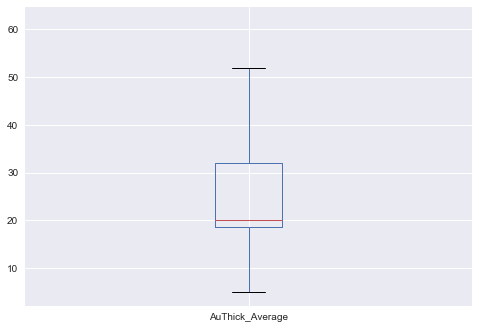

In [10]:
df.boxplot(column='AuThick_Average')


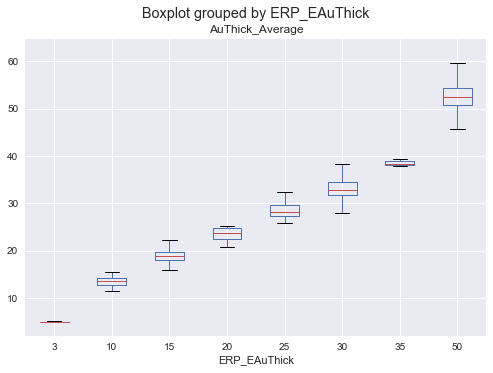

In [11]:
df.boxplot(column='AuThick_Average', by = 'ERP_EAuThick')


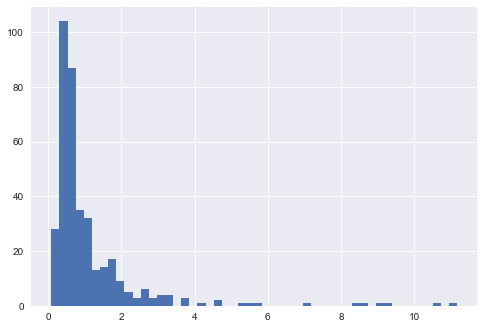

In [12]:
df['QUANTITY'].unique()
df['QUANTITY'].value_counts()
df['ERP_EAuThick'].value_counts()
df['range'].hist(bins=50)

ERP_EAuThick
3     Axes(0.125,0.125;0.775x0.755)
10    Axes(0.125,0.125;0.775x0.755)
15    Axes(0.125,0.125;0.775x0.755)
20    Axes(0.125,0.125;0.775x0.755)
25    Axes(0.125,0.125;0.775x0.755)
30    Axes(0.125,0.125;0.775x0.755)
35    Axes(0.125,0.125;0.775x0.755)
50    Axes(0.125,0.125;0.775x0.755)
Name: AuThick_Average, dtype: object

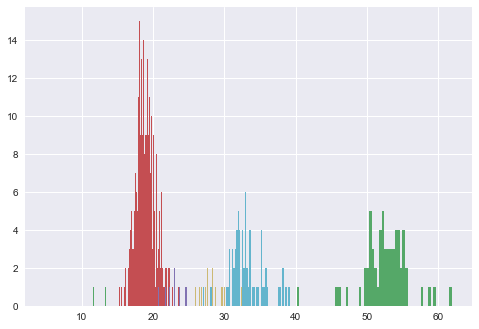

In [13]:
#
h = df.groupby(['ERP_EAuThick'])
h['AuThick_Average'].hist(bins=60)
#

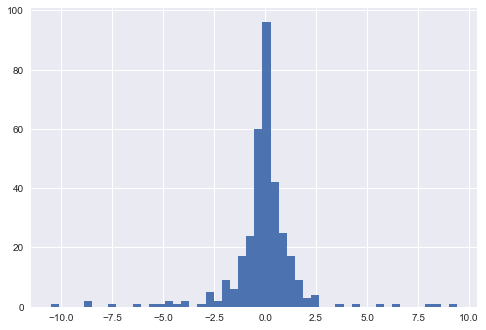

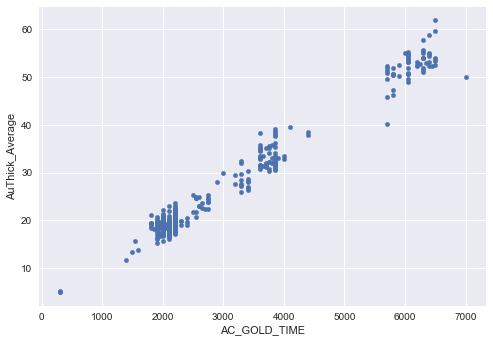

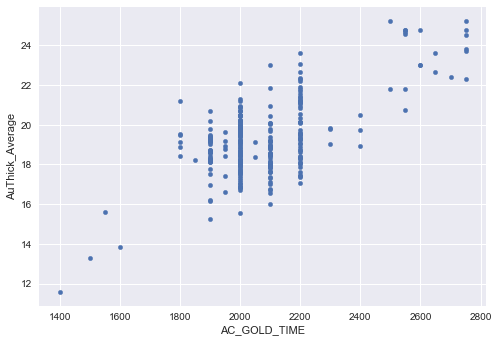

In [14]:
df['range'].diff().hist(bins=50)
df.plot.scatter(x='AC_GOLD_TIME', y='AuThick_Average');
df[df.ERP_Thick_NEW =='PEAK1'].plot.scatter(x='AC_GOLD_TIME', y='AuThick_Average')

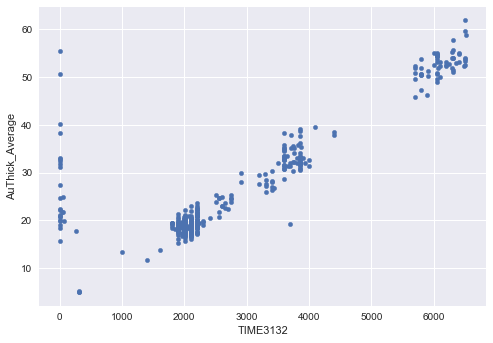

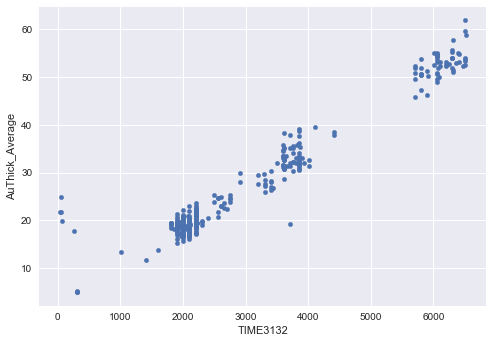

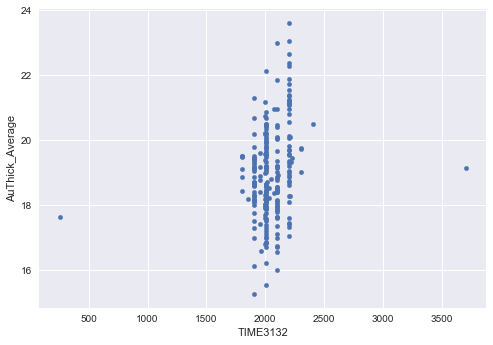

In [15]:
df.plot.scatter(x='TIME3132', y='AuThick_Average');
df[df.TIME3132>=2].plot.scatter(x='TIME3132', y='AuThick_Average');
df[(df.TIME3132>=250) & (df.ERP_EAuThick ==15)].plot.scatter(x='TIME3132', y='AuThick_Average');

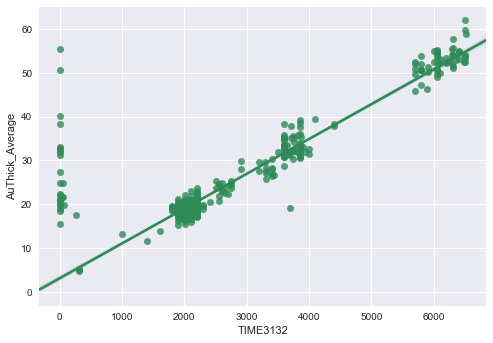

In [16]:
sns.regplot("TIME3132", "AuThick_Average", data=df,robust=True, ci=95, color="seagreen")
sns.despine()

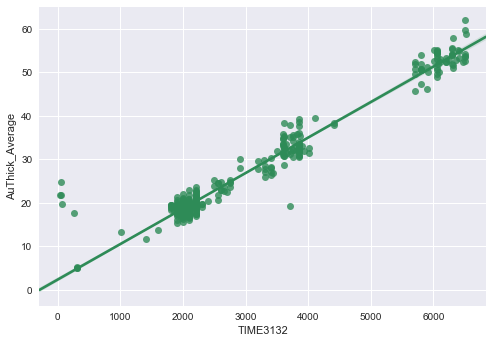

In [17]:
sns.regplot("TIME3132", "AuThick_Average", data=df[df.TIME3132>=25],robust=True, ci=95, color="seagreen")
sns.despine()

In [18]:
############################################################# Aggregate == aggregate(AuThick_Average~ERP_EAuThick,data=raw_data,var)
g = df.groupby(['ERP_EAuThick'])
g['AuThick_Average'].var()
##

ERP_EAuThick
3      0.022809
10     2.795836
15     1.981122
20     1.758796
25     2.881608
30     5.558475
35     0.698764
50    10.578210
Name: AuThick_Average, dtype: float64

In [21]:
df.groupby(['QUANTITY','ERP_EAuThick']).mean().head()

Unnamed: 0  TARGET_NO        AREA  ERP_EFrontareaSQ  \
QUANTITY ERP_EAuThick                                                        
1        3             137.000000   1.000000   14.000000         13.538000   
         15            291.333333   1.148148  112.527778         46.881639   
         20            248.555556   1.444444   50.222222         23.565778   
         25            487.666667   1.000000   89.833333         42.339500   
         30            322.071429   1.035714  149.428571         76.742857   

                       ERP_EBackareaSQ  GOLD_TIME  AC_GOLD_TIME  \
QUANTITY ERP_EAuThick                                             
1        3                    0.000000      480.0    300.000000   
         15                  66.690361      480.0   2051.388889   
         20                  26.725333      480.0   2588.888889   
         25                  47.581000      480.0   3300.000000   
         30                  81.810500      480.0   3723.214286   

                       PRESENT_DIPPING_12  PRESENT_DIPPING_13  \
QUANTITY ERP_EAuThick                                           
1        3                       0.000000           18.000000   
         15                      4.833333           12.092593   
         20                      5.777778            7.666667   
         25                     15.833333            5.666667   
         30                      8.250000           10.714286   

                       PRESENT_DIPPING_21    ...     TEMPERATURE2122  \
QUANTITY ERP_EAuThick                        ...                       
1        3                    1806.000000    ...           77.100000   
         15                   1106.175926    ...           71.635185   
         20                    562.444444    ...           51.500000   
         25                    400.500000    ...           77.883333   
         30                   1033.785714    ...           71.967857   

                       TEMPERATURE2627  TEMPERATURE3132  HEATING2122  \
QUANTITY ERP_EAuThick                                                  
1        3                   85.300000        50.900000    80.200000   
         15                  79.225000        47.958333    74.180556   
         20                  56.533333        49.322222    53.188889   
         25                  84.700000        50.916667    80.683333   
         30                  78.760714        47.292857    74.557143   

                       HEATING3132    VOLAPP    AU_var        max        min  \
QUANTITY ERP_EAuThick                                                          
1        3               54.700000  0.001195  0.000955   5.247570   5.162870   
         15              51.587963  0.036297  0.199348  19.922601  19.133222   
         20              52.755556  0.018987  0.068663  23.910671  23.322999   
         25              54.533333  0.041255  0.137397  28.901697  28.092727   
         30              50.842857  0.082430  0.372562  34.344555  33.230809   

                          range  
QUANTITY ERP_EAuThick            
1        3             0.084700  
         15            0.789379  
         20            0.587673  
         25            0.808970  
         30            1.113746  

[5 rows x 63 columns]

In [22]:
grpagg = df.groupby('ERP_EAuThick').aggregate(np.mean)
grpagg

,Unnamed: 0,QUANTITY,TARGET_NO,AREA,ERP_EFrontareaSQ,ERP_EBackareaSQ,GOLD_TIME,AC_GOLD_TIME,PRESENT_DIPPING_12,PRESENT_DIPPING_13,...,TEMPERATURE2122,TEMPERATURE2627,TEMPERATURE3132,HEATING2122,HEATING3132,VOLAPP,AU_var,max,min,range
ERP_EAuThick,,,,,,,,,,,,,,,,,,,,,
3,135.333333,1.666667,1.333333,22.666667,13.538000,0.000000,480.0,300.000000,0.000000,17.333333,...,77.166667,85.166667,50.833333,79.966667,54.600000,0.001859,0.004726,5.136705,4.968900,0.167805
10,616.750000,2.250000,1.500000,386.750000,90.170000,89.607500,480.0,1512.500000,10.750000,0.000000,...,39.075000,42.525000,38.000000,40.425000,40.900000,0.082379,0.181294,13.351630,12.470503,0.881127
15,328.196078,1.647059,1.101961,193.611765,52.437157,69.288698,480.0,2049.411765,7.137255,10.807843,...,74.041569,81.069412,49.234118,76.641569,52.961961,0.060176,0.209812,19.456830,18.635842,0.820988
20,356.300000,1.750000,1.200000,142.750000,33.140950,40.973650,480.0,2630.000000,10.700000,6.000000,...,61.805000,67.870000,47.635000,64.025000,51.080000,0.054330,0.087684,23.868738,23.196908,0.671830
25,464.687500,1.812500,1.062500,164.125000,45.337938,49.867312,480.0,3275.000000,14.937500,4.312500,...,68.200000,73.906250,44.562500,70.631250,47.825000,0.076111,0.156324,28.802327,27.950200,0.852127
30,357.621212,1.696970,1.075758,221.469697,66.544500,75.410030,480.0,3749.242424,8.318182,10.287879,...,72.768182,79.637879,47.069697,75.403030,50.557576,0.120690,0.570352,33.975070,32.790398,1.184672
35,266.000000,1.333333,1.000000,121.333333,43.632000,43.378000,480.0,4300.000000,0.000000,17.666667,...,76.766667,84.800000,50.933333,79.266667,54.466667,0.076366,0.842804,39.570950,37.487750,2.083200
50,328.196721,1.180328,1.081967,187.950820,76.581590,80.666525,480.0,6132.786885,5.786885,11.278689,...,74.727869,80.159016,48.462295,77.459016,51.939344,0.162284,2.268431,53.795057,51.053355,2.741702


In [23]:
############################################################# Subset == df[df$a <= df$b,]
df2 = df[['AC_GOLD_TIME','AuThick_Average','ERP_EAuThick','max','min','AUTHICK_02','AUTHICK_04']]
df2.dtypes

AC_GOLD_TIME         int64
AuThick_Average    float64
ERP_EAuThick         int64
max                float64
min                float64
AUTHICK_02         float64
AUTHICK_04         float64
dtype: object

In [24]:
df2[df2.ERP_EAuThick ==20].head()

,AC_GOLD_TIME,AuThick_Average,ERP_EAuThick,max,min,AUTHICK_02,AUTHICK_04
49,2750,25.233568,20,25.40288,25.07927,25.12465,25.40288
50,2750,23.816776,20,23.96066,23.70153,23.96066,23.95850
63,2550,24.660304,20,24.98803,24.13260,24.89762,24.98803
64,2550,24.792230,20,NaN,NaN,24.47551,24.80776
65,2550,24.757100,20,NaN,NaN,24.98803,NaN


In [25]:
df2 = df[['TIME3132','CONDUCTIVITY_30','CONDUCTIVITY_35','AU_var','range','ERP_EAuThick']]
df2[df2.TIME3132 == 0].head()

,TIME3132,CONDUCTIVITY_30,CONDUCTIVITY_35,AU_var,range,ERP_EAuThick
18,0,0.0,0.0,0.014342,0.27477,30
26,0,0.0,0.0,0.103690,0.62730,15
32,0,0.0,0.0,2.059907,3.29442,15
46,0,0.0,0.0,0.203393,1.09062,50
65,0,0.0,0.0,NaN,NaN,20


In [31]:
df[["QUANTITY","range"]][(df.PART_NUMBER=="RD-2016070003")&(df.range>=0.6)]


,QUANTITY,range
24,1,0.68941
31,1,1.64941
42,2,0.78047


In [34]:
df[["PART_NUMBER","QUANTITY","range"]][(df.PART_NUMBER=="RD-2016070003")&(df.QUANTITY==2)]


,PART_NUMBER,QUANTITY,range
42,RD-2016070003,2,0.78047


In [37]:
df.loc[(df["PART_NUMBER"]=="TSMC-DD007A")&(df["LOTNO"]=="2016060159-2-1-2"), ["QUANTITY","ERP_EAuThick"]]

,QUANTITY,ERP_EAuThick
16,1,15
17,2,15


In [38]:
df['TIME3132'].describe()

count     428.000000
mean     2780.156542
std      1589.901626
min         0.000000
25%      2004.000000
50%      2102.000000
75%      3605.000000
max      6512.000000
Name: TIME3132, dtype: float64

In [39]:
df[['TIME3132','TEMPERATURE3132','HEATING2122']][df.TIME3132 == 0]

,TIME3132,TEMPERATURE3132,HEATING2122
18,0,0.0,0.0
26,0,0.0,0.0
32,0,0.0,0.0
46,0,0.0,0.0
65,0,0.0,0.0
101,0,0.0,73.4
118,0,0.0,0.0
119,0,0.0,0.0
141,0,0.0,0.0
142,0,0.0,0.0


In [40]:
df['ERP_EAuThick'].value_counts()


15    255
30     66
50     61
20     20
25     16
10      4
35      3
3       3
Name: ERP_EAuThick, dtype: int64

In [41]:
#
def group_ERP_Thick(old):
 if old == 'PEAK1':
    return('P1')
 else:
    if old == 'PEAK2':
       return('P2')       
    else:
       if old == 'PEAK3':
          return('P3')       
       else:
          return('ERP_3')
#

In [42]:
df2 = pd.DataFrame({'New_ERP_Thick_NEW':df['ERP_Thick_NEW'].apply(group_ERP_Thick)})


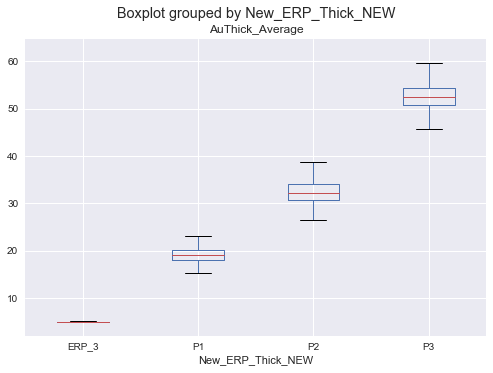

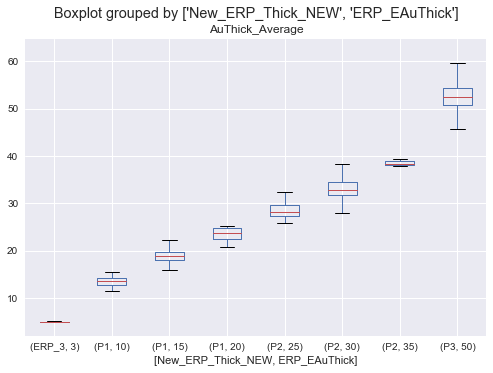

In [44]:
df =  pd.merge(df, df2, left_index = True, right_index = True)

temp1 = df.groupby('ERP_Thick_NEW').ERP_EAuThick.count()
temp1

temp1 = df2.groupby('New_ERP_Thick_NEW').count()
temp1
df.boxplot(column='AuThick_Average', by = 'New_ERP_Thick_NEW')
df.boxplot(column='AuThick_Average', by =['New_ERP_Thick_NEW','ERP_EAuThick'])

In [45]:
#
def TEST (xx):
 if xx == 'TSMC-DD007C':
    return('XX')
 else:
    if xx == 'ADVT-OT000H':
       return('YY')       
    else:
          return('OTHERS')
#
df2 = pd.DataFrame({'New_PART':df['PART_NUMBER'].apply(TEST)})

In [46]:
############################################################# FUN
#df['ERP_EAuThick'] = df['ERP_EAuThick'].astype('object')
df['ERP_EAuThick'].value_counts()
df.dtypes
#
def PEAK (xx):
 if xx == 3:
    return('ERP_3')
 else:       
    if xx in [10,15,20]:        
       return('PEAK1')       
    else:
       if xx in [25,30,35]:
          return('PEAK2')       
       else:
          return('PEAK3')
#
df2 = pd.DataFrame({'New_ERP_EAuThick':df['ERP_EAuThick'].apply(PEAK)})
df =  pd.merge(df, df2, left_index = True, right_index = True)

In [49]:
df[["ERP_Thick_NEW","New_ERP_Thick_NEW","New_ERP_EAuThick"]].head()

,ERP_Thick_NEW,New_ERP_Thick_NEW,New_ERP_EAuThick
0,PEAK1,P1,PEAK1
1,PEAK1,P1,PEAK1
2,PEAK2,P2,PEAK2
3,PEAK1,P1,PEAK1
4,PEAK1,P1,PEAK1
